This notebook provides you a template to solve Problem 01 of Assignment 04 for DH607. While starter code is provided, you are expected to fill in the details across different code blocks indicated by "INSERT YOUR CODE HERE" --> these could be multiple lines of code.

**In your final submission include a link to this notebook. Please ensure you make your notebooks available for viewing before sharing the link. To evaulate, we will run your notebooks so please ensure that "Runtime -> Restart session and run all" when invoked on your notebook runs without errors. If your notebook is not accessible, we will not be able to evaulate it**.

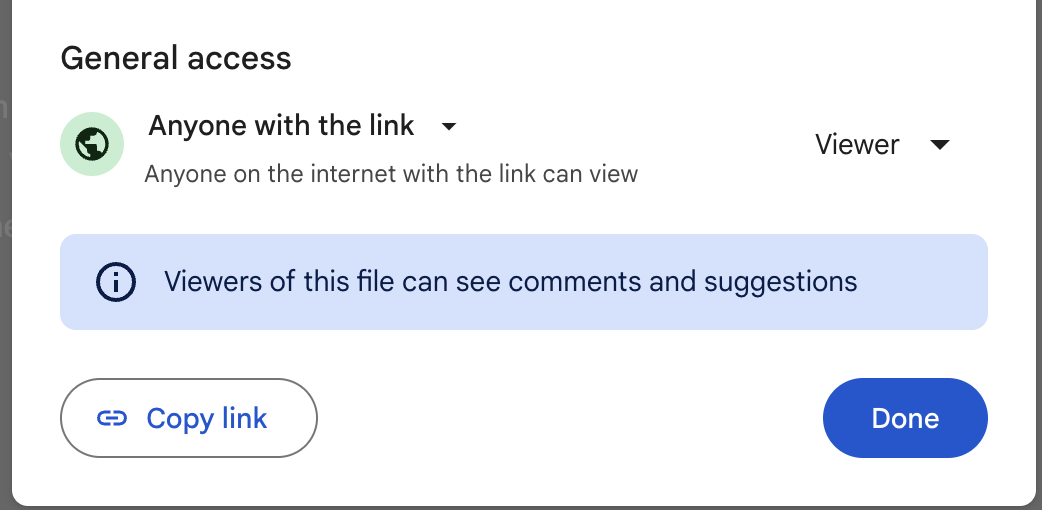

In [1]:
!pip install pyranges pandas seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 69.3 MB/s eta 0:00:00


# Problem 1 What's in a gene length anyway?

We are interested in identifying if the length of protein coding sequences vary across species. To answer this question we will download "gtf" files for each organism. Briefly, gtf stores the locations of exons, coding domain sequences (CDS) - which will code for proteins, 5' UTRs, 3' UTRs and the list of isoforms for each gene.

The first few questions focus on exploring the different isoforms of a gene before selecting the longest isoform for each gene and looking at the length distribution of protein coding sequences.



You can read about the `gtf` format [here](https://asia.ensembl.org/info/website/upload/gff.html)

You can read about the `pyranges` package [here](https://pyranges.readthedocs.io/en/latest/tutorial.html)


If you are new to pandas, consider taking this [10 minute walkthrough](https://pandas.pydata.org/docs/user_guide/10min.html)

We will be working with 5 species: [human](https://www.ensembl.org/Homo_sapiens/Info/Index), [cat](https://asia.ensembl.org/Felis_catus/Info/Index), [chicken](https://asia.ensembl.org/Gallus_gallus/Info/Index), [yeast](https://asia.ensembl.org/Saccharomyces_cerevisiae/Info/Index) and [E. huxleyi](https://protists.ensembl.org/Emiliania_huxleyi/Info/Index).


In [2]:
# download human gtf

!wget --content-disposition -c https://ftp.ensembl.org/pub/release-112/gtf/homo_sapiens/Homo_sapiens.GRCh38.112.chr.gtf.gz

--2024-09-19 08:38:29--  https://ftp.ensembl.org/pub/release-112/gtf/homo_sapiens/Homo_sapiens.GRCh38.112.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55524222 (53M) [application/x-gzip]
--2024-09-19 08:38:29--  https://ftp.ensembl.org/pub/release-112/gtf/homo_sapiens/Homo_sapiens.GRCh38.112.chr.gtf.gz
Reusing existing connection to ftp.ensembl.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 55524222 (53M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.112.chr.gtf.gz’

Homo_sapiens.GRCh38 100%[===================>]  52.95M  5.28MB/s    in 10s     

2024-09-19 08:38:39 (5.26 MB/s) - ‘Homo_sapiens.GRCh38.112.chr.gtf.gz’ saved [55524222/55524222]



In [3]:
# download cat gtf

!wget --content-disposition -c  https://ftp.ensembl.org/pub/release-112/gtf/felis_catus/Felis_catus.Felis_catus_9.0.112.chr.gtf.gz

--2024-09-19 08:38:39--  https://ftp.ensembl.org/pub/release-112/gtf/felis_catus/Felis_catus.Felis_catus_9.0.112.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3098984 (3.0M) [application/x-gzip]
--2024-09-19 08:38:39--  https://ftp.ensembl.org/pub/release-112/gtf/felis_catus/Felis_catus.Felis_catus_9.0.112.chr.gtf.gz
Reusing existing connection to ftp.ensembl.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 3098984 (3.0M) [application/x-gzip]
Saving to: ‘Felis_catus.Felis_catus_9.0.112.chr.gtf.gz’

Felis_catus.Felis_c 100%[===================>]   2.96M  5.57MB/s    in 0.5s    

2024-09-19 08:38:40 (5.57 MB/s) - ‘Felis_catus.Felis_catus_9.0.112.chr.gtf.gz’ saved [3098984/3098984]



In [4]:
# download chicken gtf

!wget --content-disposition -c  https://ftp.ensembl.org/pub/release-112/gtf/gallus_gallus/Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf.gz

--2024-09-19 08:38:40--  https://ftp.ensembl.org/pub/release-112/gtf/gallus_gallus/Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18238956 (17M) [application/x-gzip]
--2024-09-19 08:38:40--  https://ftp.ensembl.org/pub/release-112/gtf/gallus_gallus/Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf.gz
Reusing existing connection to ftp.ensembl.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 18238956 (17M) [application/x-gzip]
Saving to: ‘Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf.gz’

Gallus_gallus.bGalG 100%[===================>]  17.39M  5.62MB/s    in 3.1s    

2024-09-19 08:38:43 (5.62 MB/s) - ‘Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf.gz’ saved [18238956/18238956]



In [5]:
# download Ehuxleyi gtf

!wget --content-disposition -c https://ftp.ensemblgenomes.ebi.ac.uk/pub/protists/release-59/gtf/emiliania_huxleyi/Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf.gz

--2024-09-19 08:38:43--  https://ftp.ensemblgenomes.ebi.ac.uk/pub/protists/release-59/gtf/emiliania_huxleyi/Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf.gz
Resolving ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)... 193.62.193.161
Connecting to ftp.ensemblgenomes.ebi.ac.uk (ftp.ensemblgenomes.ebi.ac.uk)|193.62.193.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6021808 (5.7M) [application/x-gzip]
--2024-09-19 08:38:43--  https://ftp.ensemblgenomes.ebi.ac.uk/pub/protists/release-59/gtf/emiliania_huxleyi/Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf.gz
Reusing existing connection to ftp.ensemblgenomes.ebi.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 6021808 (5.7M) [application/x-gzip]
Saving to: ‘Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf.gz’

Emiliania_huxleyi.E 100%[===================>]   5.74M  --.-KB/s    in 0.1s    

2024-0

In [6]:
# download yeast gtf

!wget https://ftp.ensembl.org/pub/release-112/gtf/saccharomyces_cerevisiae/Saccharomyces_cerevisiae.R64-1-1.112.gtf.gz

--2024-09-19 08:38:43--  https://ftp.ensembl.org/pub/release-112/gtf/saccharomyces_cerevisiae/Saccharomyces_cerevisiae.R64-1-1.112.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595453 (581K) [application/x-gzip]
Saving to: ‘Saccharomyces_cerevisiae.R64-1-1.112.gtf.gz’

Saccharomyces_cerev 100%[===================>] 581.50K  --.-KB/s    in 0.1s    

2024-09-19 08:38:43 (5.32 MB/s) - ‘Saccharomyces_cerevisiae.R64-1-1.112.gtf.gz’ saved [595453/595453]



In [7]:
# uncompress
!gunzip *.gz

In [8]:
# explore human gtf

!head Homo_sapiens.GRCh38.112.chr.gtf

#!genome-build GRCh38.p14
#!genome-version GRCh38
#!genome-date 2013-12
#!genome-build-accession GCA_000001405.29
#!genebuild-last-updated 2023-12
1	havana	gene	2581560	2584533	.	+	.	gene_id "ENSG00000228037"; gene_version "1"; gene_source "havana"; gene_biotype "lncRNA";
1	havana	transcript	2581560	2584533	.	+	.	gene_id "ENSG00000228037"; gene_version "1"; transcript_id "ENST00000424215"; transcript_version "1"; gene_source "havana"; gene_biotype "lncRNA"; transcript_source "havana"; transcript_biotype "lncRNA"; tag "basic"; tag "Ensembl_canonical"; transcript_support_level "5";
1	havana	exon	2581560	2581650	.	+	.	gene_id "ENSG00000228037"; gene_version "1"; transcript_id "ENST00000424215"; transcript_version "1"; exon_number "1"; gene_source "havana"; gene_biotype "lncRNA"; transcript_source "havana"; transcript_biotype "lncRNA"; exon_id "ENSE00001795368"; exon_version "1"; tag "basic"; tag "Ensembl_canonical"; transcript_support_level "5";
1	havana	exon	2583370	2583495	.	+	.	gene_id

In [9]:
# explore e huxleyi gtf

!head Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf

#!genome-build Emiliana huxleyi CCMP1516 main genome assembly v1.0
#!genome-version Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0
#!genome-date 2013-05
#!genome-build-accession GCA_000372725.1
#!genebuild-last-updated 2013-05
AHAL01009601	ena	gene	6435	6974	.	-	.	gene_id "EMIHUDRAFT_373055"; gene_source "ena"; gene_biotype "protein_coding";
AHAL01009601	ena	transcript	6435	6974	.	-	.	gene_id "EMIHUDRAFT_373055"; transcript_id "EOD38665"; gene_source "ena"; gene_biotype "protein_coding"; transcript_name "EMIHUDRAFT_373055-1"; transcript_source "ena"; transcript_biotype "protein_coding"; tag "Ensembl_canonical";
AHAL01009601	ena	exon	6435	6974	.	-	.	gene_id "EMIHUDRAFT_373055"; transcript_id "EOD38665"; exon_number "1"; gene_source "ena"; gene_biotype "protein_coding"; transcript_name "EMIHUDRAFT_373055-1"; transcript_source "ena"; transcript_biotype "protein_coding"; exon_id "EOD38665-1"; tag "Ensembl_canonical";
AHAL01009601	ena	CDS	6580	6909	.	-	0	gene_id "EMIHUDRAFT_373055"; tr

In [10]:
# imports
import pyranges as pr
import pandas as pd
import seaborn as sns
import numpy as np

In [11]:
# read all files as pyranges object at once

human_gr = pr.read_gtf("Homo_sapiens.GRCh38.112.chr.gtf")
cat_gr = pr.read_gtf("Felis_catus.Felis_catus_9.0.112.chr.gtf")
chicken_gr = pr.read_gtf("Gallus_gallus.bGalGal1.mat.broiler.GRCg7b.112.chr.gtf")

ehuxleyi_gr = pr.read_gtf("Emiliania_huxleyi.Emiliana_huxleyi_CCMP1516_main_genome_assembly_v1.0.59.gtf")
yeast_gr = pr.read_gtf("Saccharomyces_cerevisiae.R64-1-1.112.gtf")

# Problem 1a) [5 points] How many total genes do each species have?

Write a function that takes input as pyranges and returns the number of genes in the associated gtf as the output

In [12]:
def total_genes(gr):
    """Return total genes in a gtf"""

    genes = gr[gr.Feature == 'gene']


    return len(genes)

In [13]:
# DO NOT DELETE

all_genes = pd.DataFrame({"species" :["human",
                                      "cat",
                                      "chicken",
                                      "yeast",
                                      "ehuxleyi"],
                          "total_genes": [total_genes(human_gr),
                                          total_genes(cat_gr),
                                          total_genes(chicken_gr),
                                          total_genes(yeast_gr),
                                          total_genes(ehuxleyi_gr)]})
all_genes# DO NOT DELETE

,species,total_genes
0,human,63086
1,cat,15060
2,chicken,29558
3,yeast,7127
4,ehuxleyi,38788


# Problem 1b) [5 points] What is the distribution of various types of genes in the human gtf?

Gene types are in the `gene_biotype` column and you can get a brief description of what these mean [here](https://www.gencodegenes.org/pages/biotypes.html)

In [14]:
def genes_by_genebiotype(gr):
    """Return the number of genes by gene_biotype"""

    genes = gr[gr.Feature == 'gene']


    biotype_counts = genes.df['gene_biotype'].value_counts()

    return biotype_counts

In [15]:
genes_by_genebiotype(human_gr) # DO NOT DELETE

,count
gene_biotype,
protein_coding,20065
lncRNA,19258
processed_pseudogene,10142
unprocessed_pseudogene,2602
misc_RNA,2208
snRNA,1901
miRNA,1879
TEC,1052
transcribed_unprocessed_pseudogene,962


# Problem 1c) [5 points] What is the total number of protein coding genes in each species?

Write a function to  obtain number of protein coding genes for each species.

In [16]:
def total_protein_coding_genes(gr):
    """Get total protein coding genes in a gtf"""

    protein_coding_genes = gr[(gr.Feature == 'gene') & (gr.gene_biotype == 'protein_coding')]


    return len(protein_coding_genes)

In [17]:
# DO NOT DELETE
pc_genes = pd.DataFrame({"species" :["human", "cat", "chicken", "yeast", "ehuxleyi"],
                      "total_genes": [total_protein_coding_genes(human_gr), total_protein_coding_genes(cat_gr),
                                      total_protein_coding_genes(chicken_gr),  total_protein_coding_genes(yeast_gr), total_protein_coding_genes(ehuxleyi_gr)]})
pc_genes # DO NOT DELETE

,species,total_genes
0,human,20065
1,cat,5358
2,chicken,16711
3,yeast,6600
4,ehuxleyi,38544


# Problem 1d) [5 points] What is the distribution of `protein coding`, `lncRNA`, or `processed_pseudogene` genes on the '+' vs '-' strand in the human, chicken and ehuxleyi gtf?

Your function should filter any other gene biotype that is not among `['protein_coding', 'lncRNA', 'processed_pseudogene']`.
HINT: You can convert a pyranges object to a dataframe.


In [18]:
def genes_by_genebiotype_and_strand(gr):
    """
    Returns number of genes by strand keeping only protein_coding, lncRNA and processed_pseudogene.
    Returns a dataframe with cols [gene_biotype, Strand, count]
    """

    filtered_genes = gr[(gr.Feature == 'gene') &
                        (gr.gene_biotype.isin(['protein_coding', 'lncRNA', 'processed_pseudogene']))]


    df = filtered_genes.df
    gene_counts = df.groupby(['gene_biotype', 'Strand'],observed=True).size().reset_index(name='count')
    return gene_counts

In [19]:
genes_by_genebiotype_and_strand(human_gr) # DO NOT DELETE

,gene_biotype,Strand,count
0,lncRNA,-,9492
1,lncRNA,+,9766
2,processed_pseudogene,-,5160
3,processed_pseudogene,+,4982
4,protein_coding,-,9898
5,protein_coding,+,10167


In [20]:
genes_by_genebiotype_and_strand(chicken_gr) # DO NOT DELETE

,gene_biotype,Strand,count
0,lncRNA,-,5854
1,lncRNA,+,5853
2,processed_pseudogene,-,8
3,processed_pseudogene,+,7
4,protein_coding,-,8264
5,protein_coding,+,8447


In [21]:
genes_by_genebiotype_and_strand(ehuxleyi_gr) # DO NOT DELETE

,gene_biotype,Strand,count
0,protein_coding,-,19153
1,protein_coding,+,19391


# Problem 1e-f) [15 points] What is the distribution of number of isoforms for `protein coding` genes?

In the following code section, write a function to get the number of unique isoforms per gene. Your function should return a two column data frame with gene_id as the first index and the number of isoforms as the second column. Problems 1e-g will make use of this function.

In [22]:
def number_of_isoforms_per_gene(gr):
    """
    Return the number of unique isoforms per gene.
    Returns a dataframe with cols [gene_id, number_of_isoforms]
    """
    # Filter for 'transcript' features, as isoforms are usually listed as transcripts
    transcripts = gr[gr.Feature == 'transcript']

    # Group by gene_id and count the number of unique transcript_ids (isoforms) for each gene
    isoform_counts = transcripts.df.groupby('gene_id')['transcript_id'].nunique().reset_index(name='number_of_isoforms')

    return isoform_counts

# Problem 1e)[5 points] Which two genes have the higest number (quantify) of isoforms in the human gtf?

Note that your function above uses `gene_id`, but you are required to find out the gene names.

In [23]:
human_nisoforms_per_gene = number_of_isoforms_per_gene(human_gr) # DO NOT DELETE
human_nisoforms_per_gene # DO NOT DELETE

,gene_id,number_of_isoforms
0,ENSG00000000003,4
1,ENSG00000000005,2
2,ENSG00000000419,16
3,ENSG00000000457,5
4,ENSG00000000460,9
...,...,...
63081,ENSG00000293595,3
63082,ENSG00000293596,3
63083,ENSG00000293597,17
63084,ENSG00000293599,1


In [24]:

top_2_genes = human_nisoforms_per_gene.sort_values(by='number_of_isoforms', ascending=False).head(2)

gene_name_mapping = human_gr.df.set_index('gene_id')['gene_name'].to_dict()
top_2_genes['gene_name'] = top_2_genes['gene_id'].map(gene_name_mapping)

print(top_2_genes[['gene_id', 'gene_name', 'number_of_isoforms']])


               gene_id  gene_name  number_of_isoforms
14723  ENSG00000179818  PCBP1-AS1                 296
23105  ENSG00000215386   MIR99AHG                 258


# Problem 1f)[10 points] What is the distribution of number of isoforms per gene across all species: human, cat, chicken, yeast and ehuxleyi?

Make a [violin plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) with y-axis as the name of the species and x axis as the number of isoforms per protein coding gene (using function from 1e).


<Axes: xlabel='number_of_isoforms', ylabel='species'>

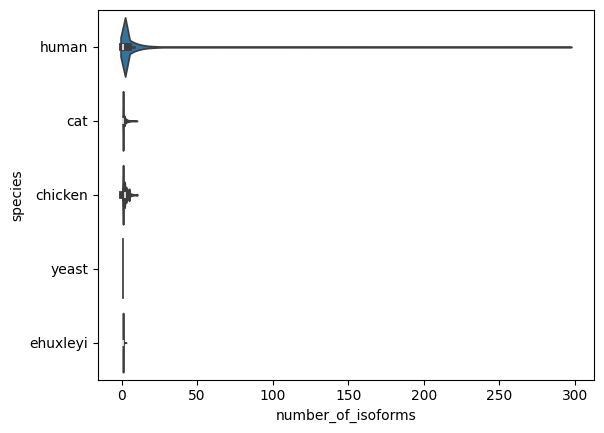

In [25]:
# DO NOT DELETE

grs = {"human": human_gr, "cat": cat_gr, "chicken": chicken_gr, "yeast": yeast_gr, "ehuxleyi": ehuxleyi_gr}
nexons_per_isoform_list = []
for species, gr in grs.items():
  df = number_of_isoforms_per_gene(gr)
  df["species"] = species
  nexons_per_isoform_list.append(df)

nisoforms_per_gene_df = pd.concat(nexons_per_isoform_list)
sns.violinplot(data=nisoforms_per_gene_df, x="number_of_isoforms", y="species", hue="species")


In the next code section, make a plot only for yeast and ehuxleyi

<Axes: xlabel='number_of_isoforms', ylabel='species'>

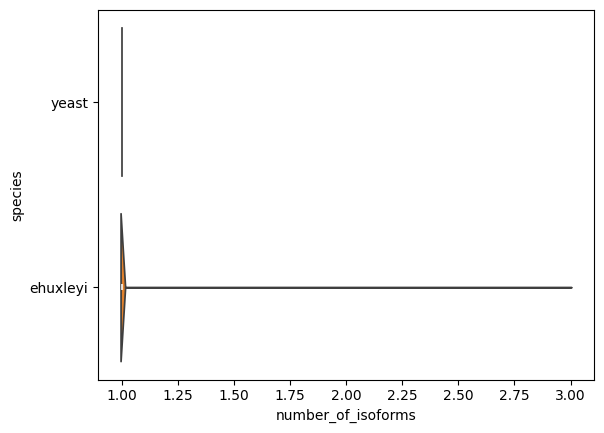

In [26]:
# DO NOT DELETE

nisoforms_per_gene_subset1 = nisoforms_per_gene_df[nisoforms_per_gene_df.species.isin(["yeast", "ehuxleyi"])]
sns.violinplot(data=nisoforms_per_gene_subset1, x="number_of_isoforms", y="species", hue="species")

In the next code section, make a plot only for human, cat and chicken. What do you notice?


<Axes: xlabel='number_of_isoforms', ylabel='species'>

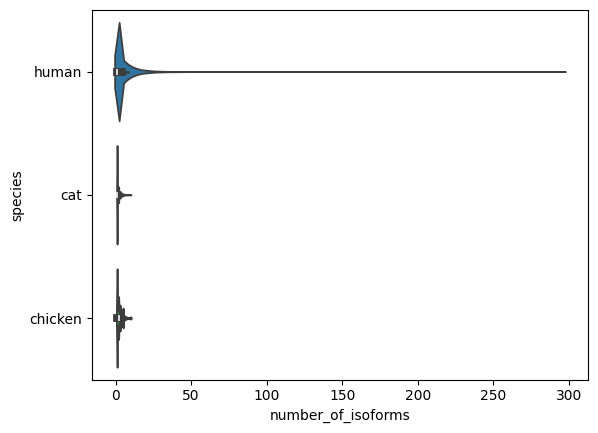

In [27]:
# DO NOT DELETE

nisoforms_per_gene_subset2 = nisoforms_per_gene_df[~nisoforms_per_gene_df.species.isin(["yeast", "ehuxleyi"])]
sns.violinplot(data=nisoforms_per_gene_subset2, x="number_of_isoforms", y="species", hue="species")

*   Human genes exhibit a long tail with some having up to 300 or more isoforms, indicating high isoform diversity.
*   Most human genes have relatively few isoforms, with a dense concentration near lower isoform counts.
*   Both cat and chicken species show a more compact distribution with most genes having fewer than 10 isoforms, lacking the extended tail seen in humans.
*   The long tail in human data suggests greater alternative splicing diversity, whereas the compact distribution in cats and chickens indicates less isoform diversity.





# Problem 1g-h)[10 points] What is the distribution of log10(length) of protein_coding, lncRNA, and processed_pseudogene isoforms in the human gtf?

Write  afunction to get the length of isoform of a given gene_biotype



In [28]:
def get_isoform_length(gr, gene_biotype):
  """Return a dataframe with length of all isoforms of a certain gene_biotype
  Your output should be a series of lengths (i.e. nothing else is necessary)
  """
  transcripts = gr[(gr.Feature == 'transcript') & (gr.gene_biotype == gene_biotype)]

  isoform_lengths = transcripts.df['End'] - transcripts.df['Start']

  return isoform_lengths

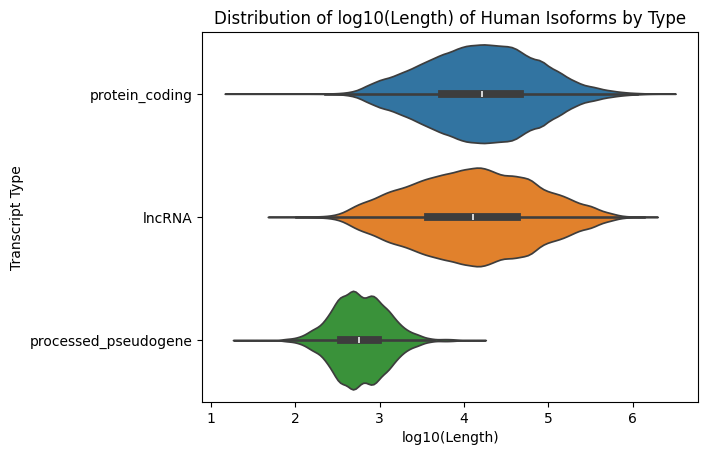

In [29]:
# INSERT CODE HERE TO PLOT THE DISTRIBUTION OF length of human isoforms of type:
# protein coding, lncRNA and processed pseudogene on a violinplot
# The xaxis of violin plot should be log10(length) and xaxis should be the name
# of the transcript

# DO NOT DELETE

import matplotlib.pyplot as plt
protein_coding = get_isoform_length(human_gr, gene_biotype="protein_coding")
lncrna = get_isoform_length(human_gr, gene_biotype="lncRNA")
pseudogene = get_isoform_length(human_gr, gene_biotype="processed_pseudogene")
protein_coding = pd.DataFrame({"length": protein_coding, "type": ["protein_coding"] * len(protein_coding)})
lncrna = pd.DataFrame({"length": lncrna, "type": ["lncRNA"] * len(lncrna)})
pseudogene = pd.DataFrame({"length": pseudogene, "type": ["processed_pseudogene"] * len(pseudogene)})

# DO NOT DELETE

df = pd.concat([protein_coding, lncrna, pseudogene])
df["log10_length"] = np.log10(df["length"])
sns.violinplot(data=df, x="log10_length", y="type", hue="type")
plt.xlabel('log10(Length)')
plt.ylabel('Transcript Type')
plt.title('Distribution of log10(Length) of Human Isoforms by Type')
plt.show()

# Problem 1i)[10 points] How many exons make up a protein coding transcriptome?

Write a function to obtain the number of exons per isoform in a given gtf. It should return a dataframe with first column as `transcript_id` and second column as the number of exons. You can identify unique exons per transcript using the `exon_id` column.


In [30]:
def number_of_exons_per_isoform(gr):
    """
    Return number of exons per isoform as a dataframe.
    Returns a dataframe with cols [transcript_id, number_of_exons]
    """
    # Filter for exons (Feature == 'exon')
    exons = gr[gr.Feature == 'exon']

    # Group by transcript_id and count the number of unique exon_id for each transcript
    exon_counts = exons.df.groupby('transcript_id')['exon_id'].nunique().reset_index(name='number_of_exons')

    return exon_counts

In [31]:
protein_coding_exons = number_of_exons_per_isoform(human_gr)
protein_coding_exons

,transcript_id,number_of_exons
0,ENST00000000233,6
1,ENST00000000412,7
2,ENST00000000442,7
3,ENST00000001008,10
4,ENST00000001146,6
...,...,...
254065,ENST00000715724,16
254066,ENST00000715725,17
254067,ENST00000715726,8
254068,ENST00000715727,8


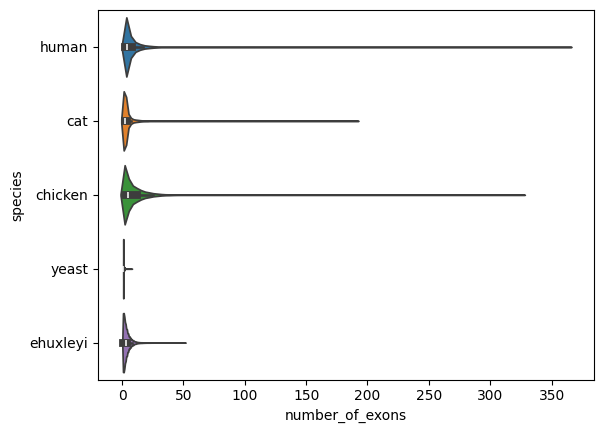

In [32]:
# DO NOT DELETE
grs = {"human": human_gr, "cat": cat_gr, "chicken": chicken_gr, "yeast": yeast_gr, "ehuxleyi": ehuxleyi_gr}
nexons_per_isoform_list = []
for species, gr in grs.items():
  df = number_of_exons_per_isoform(gr)
  df["species"] = species
  nexons_per_isoform_list.append(df)

nexons_per_isoform_df = pd.concat(nexons_per_isoform_list)
sns.violinplot(data=nexons_per_isoform_df, x="number_of_exons", y="species", hue="species")
del nexons_per_isoform_df
del nexons_per_isoform_list

# Problem 1j)[10 points] What is the distribution of the longest isoform for a given gene?

As you have seen previsouly one gene can have multiple isoforms. Our ultimate goal is to measure the total coding domain sequence length but the exons tagged as "CDS" are invidivual exons and could be part of multiple isoforms.

So we first select the longest isoform per gene, and later use only these isoform ids to plot the CDS length.



In [33]:
def longest_isoform_per_gene(gr):
    """
    Get the longest isoform per protein-coding gene.
    Returns a dataframe with one isoform per gene_id along with isoform length.
    """

    exons = gr[(gr.Feature == 'exon') & (gr.gene_biotype == 'protein_coding')]


    exons_df = exons.df.copy()


    exons_df['exon_length'] = exons_df['End'] - exons_df['Start']


    isoform_lengths = exons_df.groupby(['gene_id', 'transcript_id'])['exon_length'].sum().reset_index()

    isoform_lengths = isoform_lengths.rename(columns={'exon_length': 'tx_length'})


    longest_isoform = isoform_lengths.loc[isoform_lengths.groupby('gene_id')['tx_length'].idxmax()]

    return longest_isoform




<Axes: xlabel='tx_length', ylabel='species'>

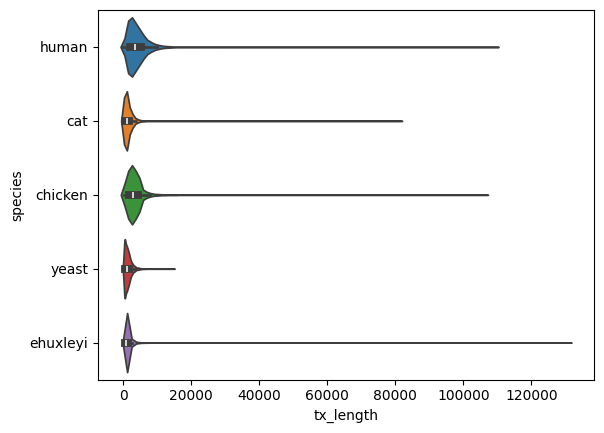

In [34]:
# DO NOT DELETE
grs = {"human": human_gr, "cat": cat_gr, "chicken": chicken_gr, "yeast": yeast_gr, "ehuxleyi": ehuxleyi_gr}
longest_isoform_list = []
for species, gr in grs.items():
  df = longest_isoform_per_gene(gr)
  df["species"] = species
  longest_isoform_list.append(df)

longest_isoform_list_df = pd.concat(longest_isoform_list)
longest_isoform_list_df["log10_tx_length"] = np.log10(longest_isoform_list_df["tx_length"])
sns.violinplot(data=longest_isoform_list_df, x="tx_length", y="species", hue="species")


<Axes: xlabel='log10_tx_length', ylabel='species'>

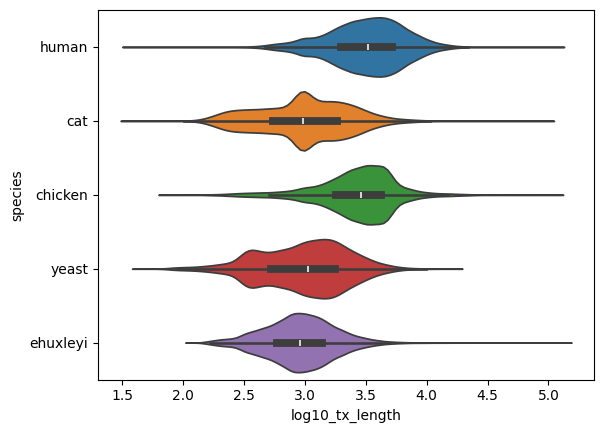

In [35]:
# DO NOT DELETE

sns.violinplot(data=longest_isoform_list_df, x="log10_tx_length", y="species", hue="species") # DO NOT DELETE

In [36]:
def get_longest_isoform_cds_lengths_per_gene(gr, transcript_id_list):
    """
    Get the longest isoform CDS length per protein-coding gene.
    Given a list of transcript_ids, returns a dataframe with columns gene_id and cds_length
    (total length of coding domain sequence of the gene).
    """

    cds_df = gr.df.copy()

    if 'Feature' not in cds_df.columns or 'CDS' not in cds_df['Feature'].unique():
        raise ValueError("The 'Feature' column must include 'CDS' in the DataFrame")


    cds_df = cds_df[(cds_df['Feature'] == 'CDS') & (cds_df['gene_biotype'] == 'protein_coding') & (cds_df['transcript_id'].isin(transcript_id_list))]


    cds_df['cds_length'] = cds_df['End'] - cds_df['Start']

    isoform_cds_lengths = cds_df.groupby(['gene_id', 'transcript_id'])['cds_length'].sum().reset_index()


    longest_isoform_cds_lengths = isoform_cds_lengths.loc[isoform_cds_lengths.groupby('gene_id')['cds_length'].idxmax()]


    longest_isoform_cds_lengths = longest_isoform_cds_lengths.rename(columns={'cds_length': 'cds_length'})

    return longest_isoform_cds_lengths[['gene_id', 'cds_length']]



<ipython-input-36-bfd1f6c06405>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cds_df['cds_length'] = cds_df['End'] - cds_df['Start']


<Axes: xlabel='cds_length', ylabel='species'>

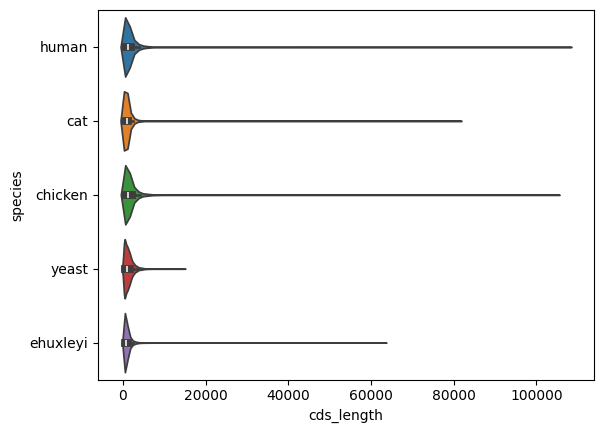

In [37]:
# DO NOT DELETE
cds_len_list = []
for species, gr in grs.items():
  tx_list = longest_isoform_list_df.loc[longest_isoform_list_df.species == species].transcript_id.tolist()
  df = get_longest_isoform_cds_lengths_per_gene(gr, tx_list)
  df["species"] = species
  cds_len_list.append(df)

cds_len_df = pd.concat(cds_len_list)
cds_len_df["cds_log10_length"] = np.log10(cds_len_df["cds_length"])
sns.violinplot(data=cds_len_df, x="cds_length", y="species", hue="species")

<Axes: xlabel='cds_log10_length', ylabel='species'>

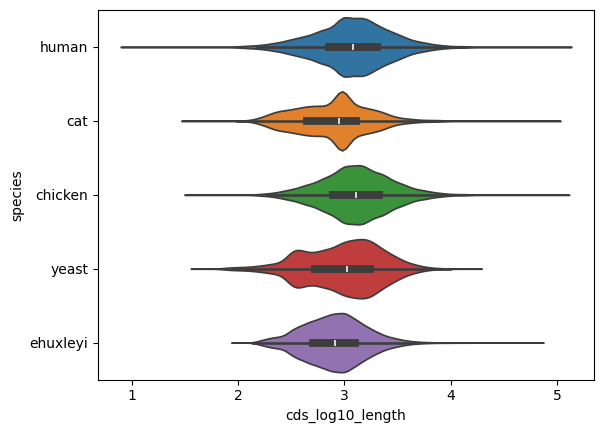

In [38]:
# DO NOT DELETE

sns.violinplot(data=cds_len_df, x="cds_log10_length", y="species", hue="species")

If you want to compare your answers, you can consult [this website](https://book.bionumbers.org/how-big-is-the-average-protein/), or [this paper](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-023-02973-2)  or [this repository](https://github.com/saketkc/gencode_regions/tree/master)